In [ ]:
!pip install umap-learn

In [5]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import umap

In [6]:
pd.set_option('display.max_columns', None)
# pd.set_option("max_rows", 300)
# return
# pd.reset_option(“max_columns”)

In [7]:
column_names = ['surgery?', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate',
                'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain',
                'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux',
                'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume', 'total protein',
                'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion?',
                'site of lesion', 'type of lesion', 'subtype', 'cp_data']

In [8]:
len(column_names)

28

Processing and reading

In [9]:
processed_data = []

with open('horse-colic.data', 'r') as file:
  for line in file:
    row = line.strip().split(' ')
    processed_data.append(row)

df = pd.DataFrame(processed_data, columns = column_names)

In [10]:
df.head()

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,site of lesion,type of lesion,subtype,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,00000,00000,2
1,1,1,534817,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,02208,00000,00000,2
2,2,1,530334,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,00000,00000,00000,1
3,1,9,5290409,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,02208,00000,00000,1
4,2,1,530255,37.30,104,35,?,?,6,2,?,?,?,?,?,?,?,?,74.00,7.40,?,?,2,2,04300,00000,00000,2


delete useless columns

In [11]:
df.drop(columns = ['Hospital Number', 'subtype', 'type of lesion'], inplace = True)

In [12]:
df.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,site of lesion,cp_data
0,2,1,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,2
1,1,1,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,02208,2
2,2,1,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,00000,1
3,1,9,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,02208,1
4,2,1,37.30,104,35,?,?,6,2,?,?,?,?,?,?,?,?,74.00,7.40,?,?,2,2,04300,2


Work with '?' in numerical values. Changing all '?' in numeric columns on mean of column



In [ ]:
df_num = df[['rectal temperature', 'pulse', 'respiratory rate', 'nasogastric reflux PH', 'packed cell volume',
             'total protein', 'abdomcentesis total protein']]

count = 0
for col in df_num:
  clear_column =  df_num[df_num[col] != '?'][col]
  mean_col = clear_column.astype(float).mean()
  for i in range(0, len(df_num[col])):
    if df_num[col][i] == '?':
      df_num[col][i] = mean_col

<ipython-input-13-c514a6c21bf6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col][i] = mean_col


One hot encoder to categorical values (column with ? we can just drop)

In [14]:
df_cat = df[[item for item in df.columns if item not in ['rectal temperature', 'pulse', 'respiratory rate', 'nasogastric reflux PH', 'packed cell volume', 'total protein', 'abdomcentesis total protein']]]


In [15]:
df_cat.columns

Index(['surgery?', 'Age', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
       'abdominal distension', 'nasogastric tube', 'nasogastric reflux',
       'rectal examination - feces', 'abdomen', 'abdominocentesis appearance',
       'outcome', 'surgical lesion?', 'site of lesion', 'cp_data'],
      dtype='object')

Divide binar and categorical values for one hot encoder

In [16]:
df_binar = df_cat[['Age', 'cp_data', 'surgical lesion?']]

df_cat = df_cat[[item for item in df_cat.columns if item not in df_binar.columns]]

In [17]:
df_cat.head()

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,rectal examination - feces,abdomen,abdominocentesis appearance,outcome,site of lesion
0,2,3,3,?,2,5,4,4,?,?,3,5,?,2,11300
1,1,?,?,4,1,3,4,2,?,?,4,2,2,3,02208
2,2,1,1,3,1,3,3,1,?,?,1,1,?,1,00000
3,1,4,1,6,2,2,4,4,1,2,3,?,3,2,02208
4,2,?,?,6,2,?,?,?,?,?,?,?,?,2,04300


In [18]:
df_cat = pd.get_dummies(df_cat)

Remove all columns with '?'

In [19]:
df_cat.drop(columns = ['surgery?_?', 'temperature of extremities_?', 'peripheral pulse_?', 'capillary refill time_?',
                      'pain_?', 'peristalsis_?', 'abdominal distension_?', 'nasogastric tube_?', 'nasogastric reflux_?',
                      'rectal examination - feces_?', 'abdomen_?', 'abdominocentesis appearance_?', 'outcome_?'], inplace = True)

Concate tables

In [20]:
dff = pd.concat([df_binar, df_num, df_cat], axis=1)

In [21]:
dff.head()

,Age,cp_data,surgical lesion?,rectal temperature,pulse,respiratory rate,nasogastric reflux PH,packed cell volume,total protein,abdomcentesis total protein,surgery?_1,surgery?_2,temperature of extremities_1,temperature of extremities_2,temperature of extremities_3,temperature of extremities_4,peripheral pulse_1,peripheral pulse_2,peripheral pulse_3,peripheral pulse_4,mucous membranes_1,mucous membranes_2,mucous membranes_3,mucous membranes_4,mucous membranes_5,mucous membranes_6,mucous membranes_?,capillary refill time_1,capillary refill time_2,capillary refill time_3,pain_1,pain_2,pain_3,pain_4,pain_5,peristalsis_1,peristalsis_2,peristalsis_3,peristalsis_4,abdominal distension_1,abdominal distension_2,abdominal distension_3,abdominal distension_4,nasogastric tube_1,nasogastric tube_2,nasogastric tube_3,nasogastric reflux_1,nasogastric reflux_2,nasogastric reflux_3,rectal examination - feces_1,rectal examination - feces_2,rectal examination - feces_3,rectal examination - feces_4,abdomen_1,abdomen_2,abdomen_3,abdomen_4,abdomen_5,abdominocentesis appearance_1,abdominocentesis appearance_2,abdominocentesis appearance_3,outcome_1,outcome_2,outcome_3,site of lesion_00000,site of lesion_00300,site of lesion_00400,site of lesion_01111,site of lesion_01124,site of lesion_01400,site of lesion_02111,site of lesion_02112,site of lesion_02113,site of lesion_02124,site of lesion_02205,site of lesion_02206,site of lesion_02207,site of lesion_02208,site of lesion_02209,site of lesion_02300,site of lesion_02305,site of lesion_02322,site of lesion_03025,site of lesion_03111,site of lesion_03112,site of lesion_03113,site of lesion_03115,site of lesion_03124,site of lesion_03133,site of lesion_03205,site of lesion_03207,site of lesion_03209,site of lesion_03300,site of lesion_03400,site of lesion_04111,site of lesion_04122,site of lesion_04124,site of lesion_04205,site of lesion_04206,site of lesion_04207,site of lesion_04300,site of lesion_05000,site of lesion_05111,site of lesion_05124,site of lesion_05205,site of lesion_05206,site of lesion_05400,site of lesion_06111,site of lesion_06112,site of lesion_06209,site of lesion_07111,site of lesion_07113,site of lesion_07209,site of lesion_07400,site of lesion_08300,site of lesion_08400,site of lesion_09000,site of lesion_09400,site of lesion_11124,site of lesion_11300,site of lesion_11400,site of lesion_12208,site of lesion_21110,site of lesion_31110,site of lesion_41110
0,1,2,2,38.50,66,28,4.707547,45.00,8.40,3.019608,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,2,2,39.2,88,20,4.707547,50,85,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2,38.30,40,24,4.707547,33.00,6.70,3.019608,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,1,1,39.10,164,84,5.00,48.00,7.20,5.30,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,2,37.30,104,35,4.707547,74.00,7.40,3.019608,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
dff.shape

(300, 125)

After processing data and removing all missing values (?), let's use algorythms

#t-SNE

In [23]:
dff_embedded = TSNE(n_components = 2, perplexity = 28).fit_transform(dff)

dff_embedded.shape

(300, 2)

In [24]:
dff_embedded[:5]

array([[  2.176497  ,  -9.072217  ],
       [  0.45110047,  28.890793  ],
       [  1.4017553 , -22.517845  ],
       [  1.0121219 ,  10.117406  ],
       [ -5.264248  ,   3.8128123 ]], dtype=float32)

<Axes: >

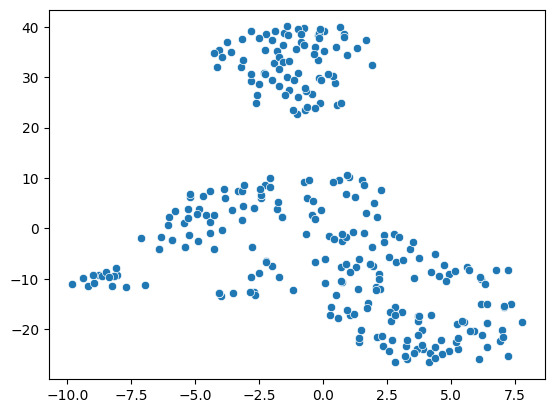

In [25]:
x_dff = dff_embedded[:, 0]
y_dff = dff_embedded[:, 1]

sns.scatterplot(x = x_dff, y = y_dff)

Using normalization (MinMax Scaler)

In [26]:
norm_scaler = MinMaxScaler()
norm_scaler = norm_scaler.fit(dff)
dff_norm = norm_scaler.transform(dff)

In [27]:
dff_norm_embedded = TSNE(n_components = 2, perplexity = 18).fit_transform(dff_norm)

dff_norm_embedded.shape

(300, 2)

In [28]:
dff_norm_embedded[:10]

array([[ 16.068588 ,  16.22261  ],
       [ -4.6299024,  11.446324 ],
       [-17.858353 , -16.562674 ],
       [ 24.057188 ,  23.505796 ],
       [  7.566988 ,   8.146603 ],
       [-13.514775 , -22.034939 ],
       [  2.192932 , -16.559155 ],
       [ 10.355035 ,  10.732911 ],
       [ 25.524282 ,  19.731138 ],
       [-10.093569 , -21.491604 ]], dtype=float32)

<Axes: >

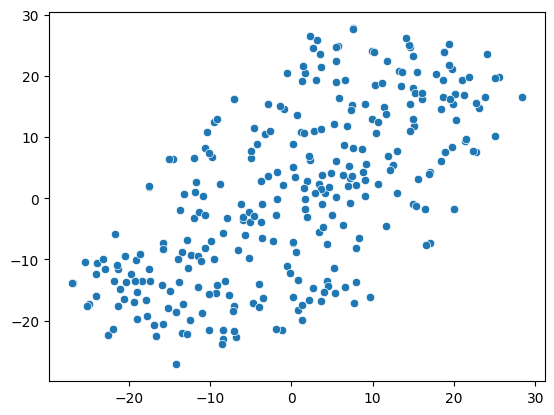

In [29]:
x_dff_norm = dff_norm_embedded[:, 0]
y_dff_norm = dff_norm_embedded[:, 1]

sns.scatterplot(x = x_dff_norm, y = y_dff_norm)

Using standardization (Standart Scaler)

In [30]:
scaler_stand = StandardScaler()
scaler_stand = scaler_stand.fit(dff)
dff_stand = scaler_stand.transform(dff)

In [31]:
dff_stand_embedded = TSNE(n_components = 2, perplexity = 8).fit_transform(dff_stand)
dff_stand_embedded.shape

(300, 2)

<Axes: >

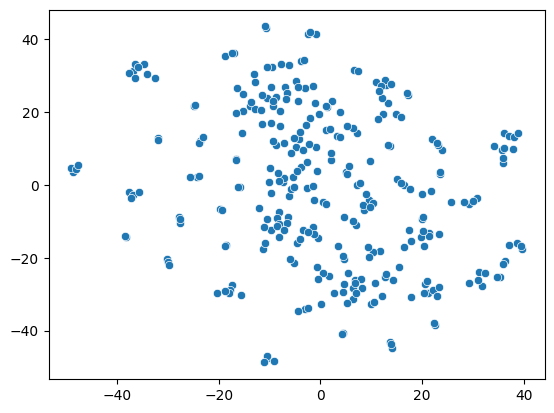

In [32]:
x_dff_stand = dff_stand_embedded[:, 0]
y_dff_stand = dff_stand_embedded[:, 1]

sns.scatterplot(x = x_dff_stand, y = y_dff_stand)

Robust (working with outlers)

In [33]:
scaler_rob = RobustScaler()
scaler_rob = scaler_rob.fit(dff)
dff_rob = scaler_rob.transform(dff)

In [34]:
dff_rob_embedded = TSNE(n_components = 2, perplexity = 28).fit_transform(dff_rob)
dff_rob_embedded.shape

(300, 2)

<Axes: >

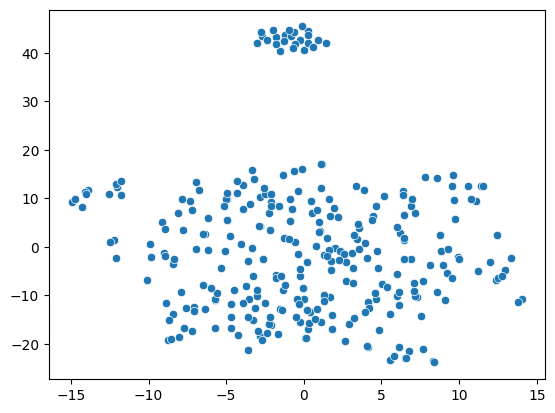

In [35]:
x_dff_rob = dff_rob_embedded[:, 0]
y_dff_rob = dff_rob_embedded[:, 1]

sns.scatterplot(x = x_dff_rob, y = y_dff_rob)

#UMAP

In [36]:
reducer = umap.UMAP()
dff_umap_embedding = reducer.fit_transform(dff)
dff_umap_embedding.shape

(300, 2)

<Axes: >

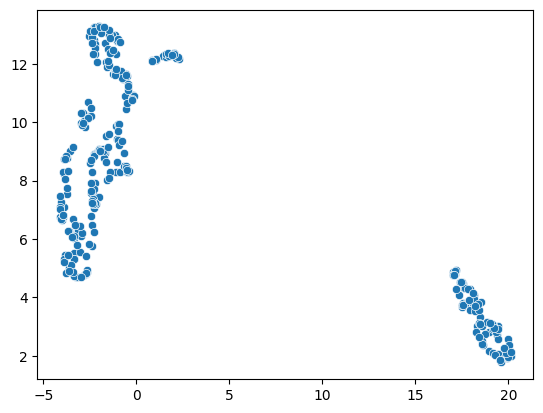

In [37]:
x_dff_umap = dff_umap_embedding[:, 0]
y_dff_umap = dff_umap_embedding[:, 1]

sns.scatterplot(x = x_dff_umap, y = y_dff_umap)

Using normalization (MinMax Scaler)

In [38]:
scaler_norm_umap = MinMaxScaler()
scaler_norm_umap = scaler_norm_umap.fit(dff)

dff_norm_umap = scaler_norm_umap.transform(dff)

In [44]:
reducer_norm = umap.UMAP()
dff_umap_norm_embedding = reducer_norm.fit_transform(dff)
dff_umap_norm_embedding.shape

(300, 2)

<Axes: >

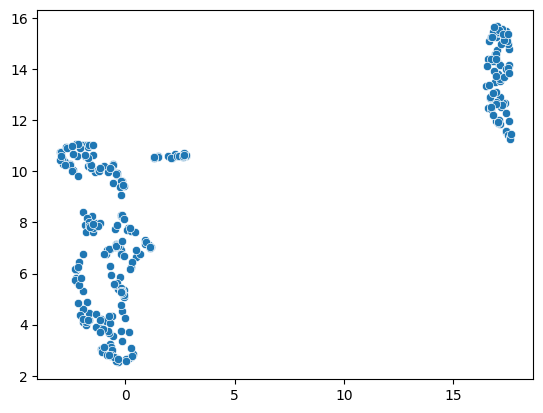

In [45]:
x_dff_umap_norm = dff_umap_norm_embedding[:, 0]
y_dff_umap_norm = dff_umap_norm_embedding[:, 1]

sns.scatterplot(x = x_dff_umap_norm, y = y_dff_umap_norm)

Using standardization (Standart Scaler)

In [46]:
scaler_st_umap = MinMaxScaler()
scaler_st_umap = scaler_st_umap.fit(dff)

dff_st_umap = scaler_st_umap.transform(dff)

In [47]:
reducer_st = umap.UMAP()
dff_umap_st_embedding = reducer_st.fit_transform(dff)
dff_umap_st_embedding.shape

(300, 2)

<Axes: >

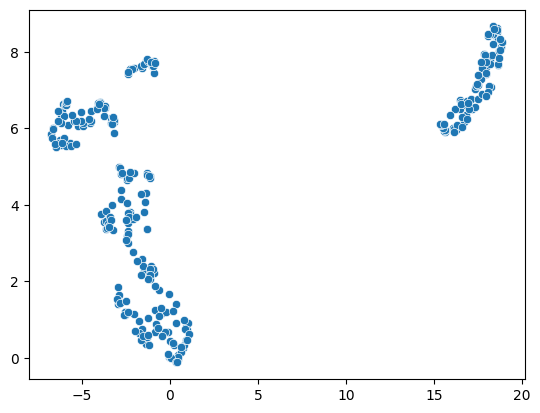

In [48]:
x_dff_umap_st = dff_umap_st_embedding[:, 0]
y_dff_umap_st = dff_umap_st_embedding[:, 1]

sns.scatterplot(x = x_dff_umap_st, y = y_dff_umap_st)

Robust

In [50]:
scaler_rob_umap = RobustScaler()
scaler_rob_umap = scaler_rob_umap.fit(dff)

dff_rob_umap = scaler_rob_umap.transform(dff)

In [51]:
reducer_rob = umap.UMAP()
dff_umap_rob_embedding = reducer_rob.fit_transform(dff)
dff_umap_rob_embedding.shape

(300, 2)

<Axes: >

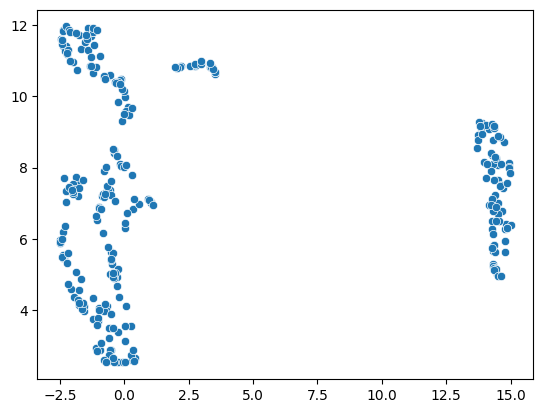

In [52]:
x_dff_umap_rob = dff_umap_rob_embedding[:, 0]
y_dff_umap_rob = dff_umap_rob_embedding[:, 1]

sns.scatterplot(x = x_dff_umap_rob, y = y_dff_umap_rob)

Алгорит T-SNE четков выделяет два кластера. В то время как UMAP также четко выделяет два кластера. Но также в последнем виднеется 3 кластера. Стандартизация и нормализация никак не повлияла на результаты.

